## The Slowness of Loops

In [1]:
import numpy as np

In [4]:
np.random.seed(0)

def compute_reciprocal(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1. / values[i]
    return output
    

In [5]:
values = np.random.randint(1, 10, size=5)
compute_reciprocal(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [9]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocal(big_array)

3.46 s ± 40.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Introducing UFuncs


In [81]:
compute_reciprocal(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [82]:
1. / values

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [83]:
%timeit 1. / big_array

1.35 ms ± 170 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


*Vectorized operations* in NumPY are implemented via **ufuncs*, whose main purpose is to quickly execute operations on values in NumPy arrays.

In [84]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [85]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size.

## Exploring NumPy's Ufuncs

### Array arithmetic

In [18]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [19]:
x + 5

array([5, 6, 7, 8])

In [20]:
x - 5

array([-5, -4, -3, -2])

In [21]:
x * 2

array([0, 2, 4, 6])

In [22]:
x / 2

array([0. , 0.5, 1. , 1.5])

In [23]:
x // 2

array([0, 0, 1, 1])

In [24]:
-x

array([ 0, -1, -2, -3])

In [25]:
x ** 2

array([0, 1, 4, 9])

In [26]:
x % 2

array([0, 1, 0, 1])

In [27]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the `+` operator is a wrapper for the `add` function.

In [28]:
np.add(x, 2)

array([2, 3, 4, 5])

### Absolute value

In [30]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [31]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [32]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [33]:
# This ufunc can hanle complex data,
# absolute values return the magnitude
x = np.array([3 -4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometic functions

In [34]:
# define an array of angles
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [35]:
np.sin(theta)

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

In [36]:
np.cos(theta)

array([ 1.000000e+00,  6.123234e-17, -1.000000e+00])

In [37]:
np.tan(theta)

array([ 0.00000000e+00,  1.63312394e+16, -1.22464680e-16])

the values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero. 

Inverse trigonometric functions are also available:

In [38]:
x = [-1, 0, 1]
x

[-1, 0, 1]

In [39]:
np.arcsin(x)

array([-1.57079633,  0.        ,  1.57079633])

In [41]:
np.arccos(x)


array([3.14159265, 1.57079633, 0.        ])

In [42]:
np.arctan(x)

array([-0.78539816,  0.        ,  0.78539816])

### Exponents and logarithms

In [43]:
x = [1, 2, 3]
x

[1, 2, 3]

In [44]:
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [45]:
np.exp2(x)

array([2., 4., 8.])

In [46]:
np.power(3, x)

array([ 3,  9, 27])

The basic `np.log` gives the natural logarithm

In [47]:
x = [1, 2, 4, 9, 10]
x


[1, 2, 4, 9, 10]

In [48]:
np.log(x)

array([0.        , 0.69314718, 1.38629436, 2.19722458, 2.30258509])

In [49]:
np.log2(x)

array([0.        , 1.        , 2.        , 3.169925  , 3.32192809])

In [50]:
np.log10(x)

array([0.        , 0.30103   , 0.60205999, 0.95424251, 1.        ])

some specialize versions that are useful for maintaining precision with very small input, when `x` is very small, these functions five more precise values than if the raw `np.log` or `np.exp` were to be used.

In [51]:
x = [0, 0.001, 0.001, 0.1]
x

[0, 0.001, 0.001, 0.1]

In [53]:
print(f'exp(x) - 1 = {np.expm1(x)}')
print(f'log(1 + x) = {np.log1p(x)}')

exp(x) - 1 = [0.         0.0010005  0.0010005  0.10517092]
log(1 + x) = [0.         0.0009995  0.0009995  0.09531018]


### Specialized ufuncs


In [55]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---- ----------------------------------- 4.2/41.0 MB 20.0 MB/s eta 0:00:02
   -------- ------------------------------- 8.4/41.0 MB 20.5 MB/s eta 0:00:02
   ------------ --------------------------- 12.8/41.0 MB 20.7 MB/s eta 0:00:02
   ----------------- ---------------------- 17.6/41.0 MB 21.1 MB/s eta 0:00:02
   --------------------- ------------------ 22.0/41.0 MB 21.2 MB/s eta 0:00:01
   ------------------------- -------------- 26.5/41.0 MB 21.3 MB/s eta 0:00:01
   ------------------------------ --------- 30.9/41.0 MB 21.3 MB/s eta 0:00:01
   ---------------------------------- ----- 35.4/41.0 MB 21.3 MB/s eta 0:00:01
   -------------------------------------- - 39.8/41.0 MB 21.2 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 19.8 MB/s eta 0:00:00


In [56]:
from scipy import special

In [57]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
special.gamma(x)

array([1.0000e+00, 2.4000e+01, 3.6288e+05])

In [58]:
special.gammaln(x)

array([ 0.        ,  3.17805383, 12.80182748])

In [60]:
special.beta(x, 2)

array([0.5       , 0.03333333, 0.00909091])

In [61]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1,0])
x

array([0. , 0.3, 0.7, 1. , 0. ])

In [62]:
special.erf(x)

array([0.        , 0.32862676, 0.67780119, 0.84270079, 0.        ])

In [63]:
special.erfc(x)

array([1.        , 0.67137324, 0.32219881, 0.15729921, 1.        ])

In [64]:
special.erfinv(x)

array([0.        , 0.27246271, 0.73286908,        inf, 0.        ])

## Adcanced Ufunc Features

### Specifying output

For large calculation, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where we'd like them to be. For all ufuncs, this can be done using the `out` argument of the function:


In [65]:
x = np.arange(5)
y = np.empty(5)

In [66]:
x

array([0, 1, 2, 3, 4])

In [67]:
y

array([1.        , 0.67137324, 0.32219881, 0.15729921, 1.        ])

In [68]:
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

In [69]:
y = np.zeros(10)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
np.power(2, x, out=y[::2])
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

If we had isntead written `y[::2] = 2 ** x`, this would have resulted in the creation of a temporary array to hold the results of `2 ** x`, followed by a second operation copying those values into the `y` array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the `out` argument can be significant.

### Aggregates


In [72]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [73]:
np.add.reduce(x)

np.int64(15)

In [75]:
np.multiply.reduce(x)

np.int64(120)

In [77]:
# store all the intermediate results of the computation
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [78]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

### Outer products

In [79]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [80]:
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Aggregations: Min, Max, and Everything in Between

## Summing the Values in an Array

In [86]:
L = np.random.random(100)
sum(L) # Python function

np.float64(49.78780119123144)

In [87]:
np.sum(L)

np.float64(49.787801191231466)

In [88]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

123 ms ± 5.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
707 μs ± 59.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Minimum and Maximum

In [89]:
min(big_array), max(big_array)

(np.float64(1.1834216460115954e-06), np.float64(0.9999999965285972))

In [90]:
np.min(big_array), np.max(big_array)

(np.float64(1.1834216460115954e-06), np.float64(0.9999999965285972))

In [91]:
%timeit min(big_array)
%timeit np.min(big_array)

85.8 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
260 μs ± 19.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [92]:
big_array.min(), big_array.max(), big_array.sum()

(np.float64(1.1834216460115954e-06),
 np.float64(0.9999999965285972),
 np.float64(499745.14796479954))

### Multi dimensional aggregates

In [93]:
M = np.random.random((3, 4))
M

array([[0.02363617, 0.0938545 , 0.14580011, 0.37512902],
       [0.73194514, 0.162946  , 0.72414732, 0.75507903],
       [0.28379948, 0.19000585, 0.63136205, 0.20045786]])

In [94]:
M.sum()

np.float64(4.318162517158296)

In [95]:
# find the min value with each column
M.min(axis=0)

array([0.02363617, 0.0938545 , 0.14580011, 0.20045786])

In [96]:
M.min(axis=1)

array([0.02363617, 0.162946  , 0.19000585])

The `axis` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned. So specifying `axis=0` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

| Function       | NaN-safe Version | Description                              |
|----------------|------------------|------------------------------------------|
| `np.sum`       | `np.nansum`      | Compute sum of elements                  |
| `np.prod`      | `np.nanprod`     | Compute product of elements              |
| `np.mean`      | `np.nanmean`     | Compute mean of elements                 |
| `np.std`       | `np.nanstd`      | Compute standard deviation               |
| `np.var`       | `np.nanvar`      | Compute variance                         |
| `np.min`       | `np.nanmin`      | Find minimum value                       |
| `np.max`       | `np.nanmax`      | Find maximum value                       |
| `np.argmin`    | `np.nanargmin`   | Find index of minimum value              |
| `np.argmax`    | `np.nanargmax`   | Find index of maximum value              |
| `np.median`    | `np.nanmedian`   | Compute median of elements               |
| `np.percentile`| `np.nanpercentile`| Compute rank-based statistics of elements|
| `np.any`       | N/A              | Evaluate whether any elements are true   |
| `np.all`       | N/A              | Evaluate whether all elements are true   |

## Example: What is the Average Height of US Presidents?

In [97]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [99]:
!pip install panda

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7296 sha256=4335e7532d3edc797c140180baa79fb8865fc476defe2f7a178450b60398df11
  Stored in directory: c:\users\linho\appdata\local\pip\cache\wheels\53\7c\f7\d3267739bc9dfdfc43724391337c9955e7d5b5830888d735e3
Successfully built panda


In [101]:
import panda as pd

ModuleNotFoundError: No module named 'request'

In [102]:
!pip uninstall panda -y

Found existing installation: panda 0.3.1
Uninstalling panda-0.3.1:
  Successfully uninstalled panda-0.3.1


In [103]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----------- ---------------------------- 3.4/11.5 MB 17.7 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.5 MB 16.8 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.5 MB 17.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 14.5 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------

In [104]:
import pandas as pd

In [105]:
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185, 191, 182])

In [106]:
heights.mean()

np.float64(180.04545454545453)

In [107]:
heights.std()

np.float64(6.983599441335736)

In [108]:
heights.min()

np.int64(163)

In [109]:
heights.max()

np.int64(193)

In [110]:
print('25th percentile')
np.percentile(heights, 25)

25th percentile


np.float64(174.75)

In [111]:
print(f'median {np.median(heights)}')

median 182.0


In [112]:
print(f'75th percentile: {np.percentile(heights, 75)}')

75th percentile: 183.5


In [114]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 17.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 18.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 12.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 14.0 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ----- ------

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

Text(0, 0.5, 'number')

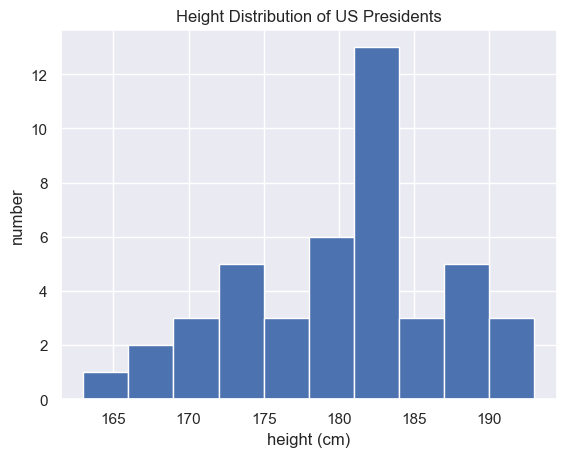

In [116]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')